## Hackathon Workation Price Prediction 

In [123]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [124]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [125]:
combined = pd.concat([train,test],ignore_index=False)

print(train.shape , test.shape , combined.shape)

(21000, 15) (9000, 14) (30000, 15)


In [126]:
combined.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [127]:
list(combined['Meals'].unique())

[3, 5, 4, 2]

In [128]:
import datetime as dt


In [129]:
combined.dtypes

Uniq Id                        object
Package Name                   object
Package Type                   object
Destination                    object
Itinerary                      object
Places Covered                 object
Travel Date                    object
Hotel Details                  object
Start City                     object
Airline                        object
Flight Stops                    int64
Meals                           int64
Sightseeing Places Covered     object
Cancellation Rules             object
Per Person Price              float64
dtype: object

In [130]:
combined.isna().sum()

Uniq Id                          0
Package Name                     0
Package Type                     0
Destination                      0
Itinerary                        0
Places Covered                   0
Travel Date                      0
Hotel Details                    0
Start City                       0
Airline                          0
Flight Stops                     0
Meals                            0
Sightseeing Places Covered       0
Cancellation Rules               0
Per Person Price              9000
dtype: int64

### Feature Engg.

In [131]:
combined['Travel Date'] = pd.to_datetime(combined['Travel Date'],dayfirst=True)

In [132]:
combined['Day'] = combined['Travel Date'].dt.day
combined['Month'] = combined['Travel Date'].dt.month
combined['Year'] = combined['Travel Date'].dt.year
combined['Week_Day'] = combined['Travel Date'].dt.dayofweek


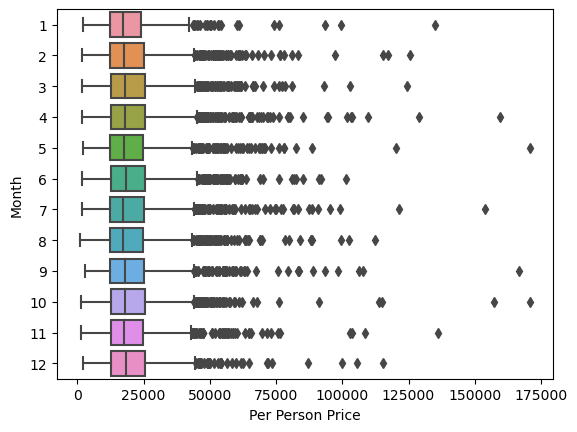

In [133]:
sns.boxplot(y=combined['Month'] , x=combined['Per Person Price'],orient='h');

In [134]:
# jan,april,may,july,sept,oct,nov

combined['Season'] = combined.Month.apply(lambda x:'Peak_Month' if x in [1,4,5,7,9,10,11] else 'Normal')

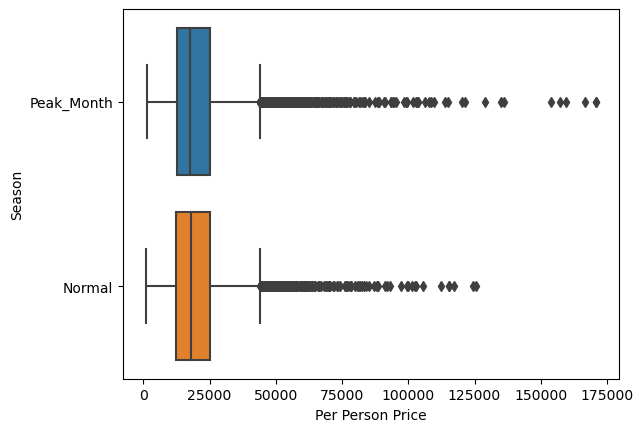

In [135]:
sns.boxplot(y=combined['Season'] , x=combined['Per Person Price'],orient='h');

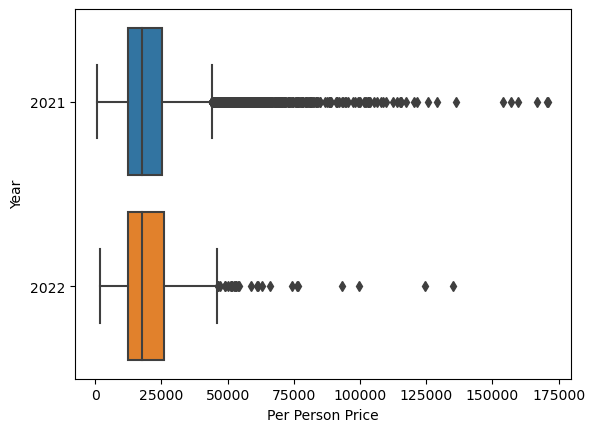

In [136]:
sns.boxplot(y=combined['Year'] , x=combined['Per Person Price'],orient='h');

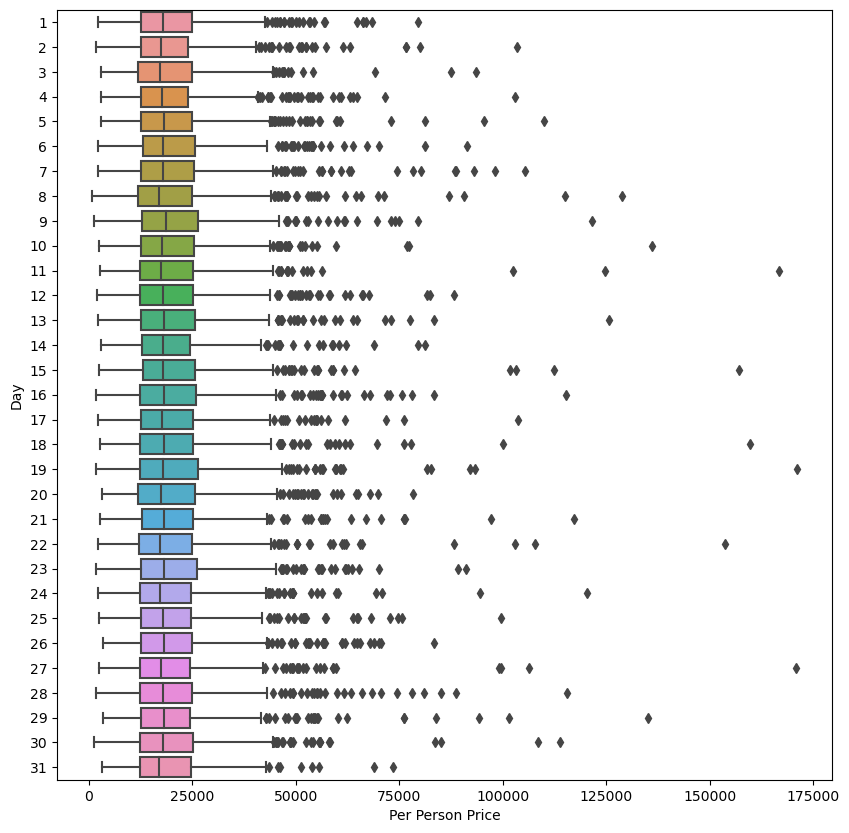

In [137]:
plt.figure(figsize=(10,10))
sns.boxplot(y=combined['Day'] , x=combined['Per Person Price'],orient='h');
# 5,8,10,11,15,16,18,19,21,22,24,,27,28,29

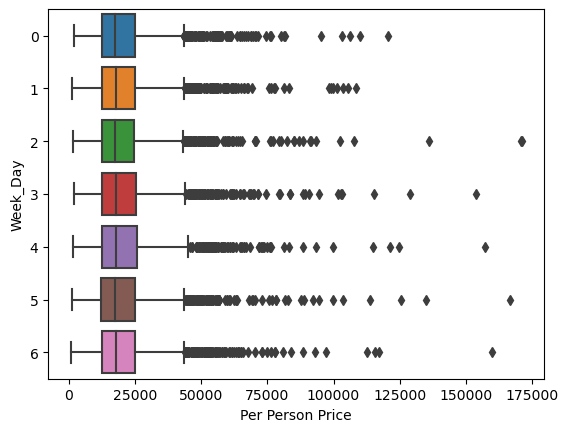

In [138]:
sns.boxplot(y=combined['Week_Day'] , x=combined['Per Person Price'],orient='h');

In [139]:
combined['Day_Season'] = combined.Day.apply(lambda x:'Peak_Days' if x in [5,8,10,11,15,18,19,27,29,30] else 'Normal_Days')

In [140]:
# check meals and airline......
combined['Meals'].value_counts()

3    16670
5     7960
4     4688
2      682
Name: Meals, dtype: int64

In [141]:
combined['Airline'].value_counts().head(10)

Not Available                  7010
IndiGo                         5292
Spicejet                       4378
Go Air                         3033
IndiGo|IndiGo                  1584
Spicejet|Spicejet              1346
Vistara                         852
Air India                       729
IndiGo|IndiGo|IndiGo|IndiGo     667
IndiGo|Spicejet                 499
Name: Airline, dtype: int64

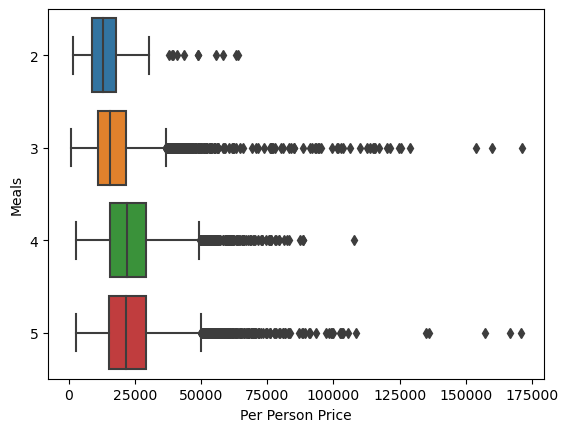

In [142]:
sns.boxplot(y=combined['Meals'] , x=combined['Per Person Price'],orient='h');

In [143]:
combined['Flights'] = combined.Airline.str.split('|',expand=True)[0]

In [144]:
a=combined.Flights.value_counts()[:5].index.to_list()

In [145]:
combined['Flights_cat'] = combined.Flights.apply(lambda x:'Top5' if x in a else 'Others')

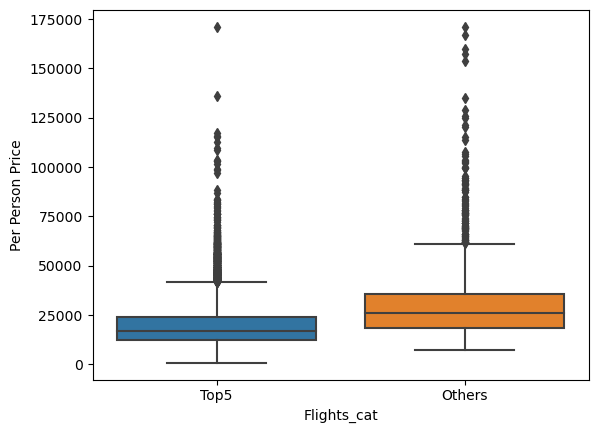

In [146]:
sns.boxplot(x=combined['Flights_cat'],y = combined['Per Person Price']);

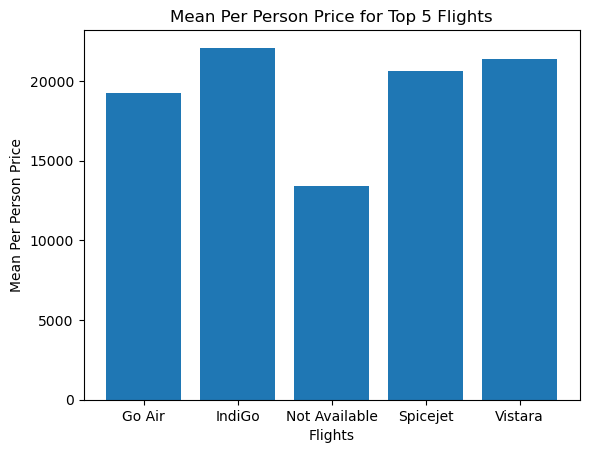

In [147]:
# Get the top 5 most common flights
top_flights = combined['Flights'].value_counts().nlargest(5).index

# Filter the DataFrame for the top flights
filtered_data = combined[combined['Flights'].isin(top_flights)]

# Group by 'Flights' and calculate the mean of 'Per Person Price'
result = filtered_data.groupby('Flights')['Per Person Price'].mean()

# Plot the results
plt.bar(result.index, result)
plt.xlabel('Flights')
plt.ylabel('Mean Per Person Price')
plt.title('Mean Per Person Price for Top 5 Flights')
plt.show()

In [148]:
combined.tail(2)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,...,Cancellation Rules,Per Person Price,Day,Month,Year,Week_Day,Season,Day_Season,Flights,Flights_cat
8998,c9ce916ec5e1b93134a2f84090284bf9,"Colorful Rajasthan- Jaipur, Jodhpur, Jaisalmer...",Deluxe,Jaipur|Jodhpur|Jaisalmer|Udaipur,2N Jaipur . 1N Jodhpur . 2N Jaisalmer . 2N Uda...,Jaipur|Jodhpur|Jaisalmer|Udaipur,2021-03-19,Souvenir Peppermint:3.9|Lariya Resort:4.3|Gorb...,New Delhi,IndiGo|IndiGo,...,Cancellation any time after making the 1st pay...,NaN,19,3,2021,4,Normal,Peak_Days,IndiGo,Top5
8999,63f248718bd829ec8a3d234f85637734,Short Trip to Shirdi for Darshan,Budget,Shirdi,2N Shirdi,Shirdi,2021-02-15,Hotel Sai Balaji:3.5,New Delhi,IndiGo|IndiGo,...,This cancellation policy is applicable for boo...,NaN,15,2,2021,0,Normal,Peak_Days,IndiGo,Top5


In [149]:
# combined places covered
# combined['Places Covered'].str.split('|',expand=True)

combined['Count_Locs'] = combined['Places Covered'].apply(lambda x:len(x.split('|')))

In [150]:
list_m = []
for i in range(0,11):
    saved = combined.Itinerary.str.split('.',expand=True)[i].str.split('N',expand=True)[0]\
    .apply(lambda x: 0 if x==None else x).astype(int)
    list_m.append(saved)

In [151]:
len(list_m[0])

30000

In [152]:
combined['Total_Travel_Days'] = pd.concat(list_m,axis=1).sum(axis=1)

In [153]:
rating = []
for i in range(0,10):
    rating.append(combined['Hotel Details'].str.split('|',expand=True)[i].str.split(':',expand=True)[1]\
                   .apply(lambda x: 0 if x is None else x ))

In [154]:
combined['Rating'] = pd.concat(rating , ignore_index=True)
combined['Rating'].unique()

array([0, '4.6', '4.4', '4.5', '4.1', 'Four', '3.6', '4', '3.8', 'Five',
       '3.5', '4.0', '3', '4.2', '4.8', '2.4', '', '4.3', 'Three', '3.0',
       '2.9', '1.5', '3.7', '3.4', '3.9', '2.1', '3.3', '2.6', '4.7',
       '4.9', '2.3', '3.2', '1.9', '5', '3.1', '2', '5.0', '2.5', '2.8',
       '2.0', 'Two', '1.6', 'A member of The Leading Hotels Of The World'],
      dtype=object)

In [155]:
combined['Rating'] = combined['Rating'].replace('Five',5)
combined['Rating'] = combined['Rating'].replace('Two',5)
combined['Rating'] = combined['Rating'].replace('Three',5)
combined['Rating'] = combined['Rating'].replace('Four',5)
combined['Rating'] = combined['Rating'].replace('A member of The Leading Hotels Of The World',0)
combined['Rating'] = combined['Rating'].replace('',0)

In [156]:
combined['Rating'] = combined['Rating'].astype(float)

In [157]:
combined['Rating'].unique()

array([0. , 4.6, 4.4, 4.5, 4.1, 5. , 3.6, 4. , 3.8, 3.5, 3. , 4.2, 4.8,
       2.4, 4.3, 2.9, 1.5, 3.7, 3.4, 3.9, 2.1, 3.3, 2.6, 4.7, 4.9, 2.3,
       3.2, 1.9, 3.1, 2. , 2.5, 2.8, 1.6])

In [158]:
combined['Count_Sighting'] = combined['Sightseeing Places Covered'].apply(lambda x: 0 if x=='Not Available'\
                                            else len(x.split('|')))

In [159]:
combined.groupby('Package Type')['Per Person Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


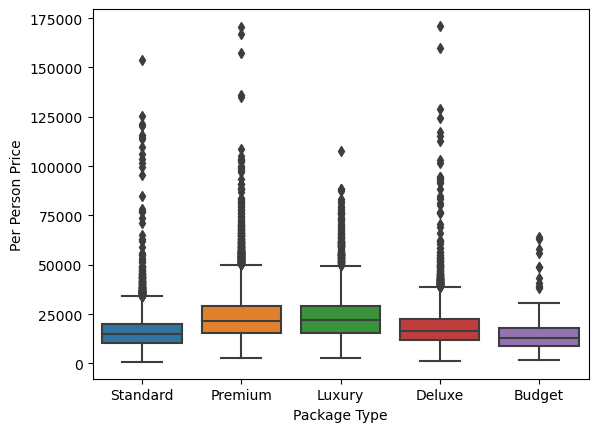

In [160]:
sns.boxplot(x=combined['Package Type'],y = combined['Per Person Price']);

In [161]:
mapped = {'Luxury':5,'Premium':4,'Deluxe':3,'Standard':2,'Budget':1}
combined['Package Type'] = combined['Package Type'].map(mapped)

In [162]:
combined['Hotel_Count'] = combined['Hotel Details']\
.apply(lambda x: 0 if x=='Not Available' else len(x.split('|')))

In [163]:
combined['Cancellation Rules'].nunique() # rules will drop

10

In [164]:
new_data = combined.drop(columns=['Uniq Id','Package Name', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details','Start City','Flights',
       'Airline', 'Sightseeing Places Covered','Cancellation Rules'],axis=1)

In [165]:
combined.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price', 'Day', 'Month', 'Year',
       'Week_Day', 'Season', 'Day_Season', 'Flights', 'Flights_cat',
       'Count_Locs', 'Total_Travel_Days', 'Rating', 'Count_Sighting',
       'Hotel_Count'],
      dtype='object')

In [166]:
new_data.head()

,Package Type,Flight Stops,Meals,Per Person Price,Day,Month,Year,Week_Day,Season,Day_Season,Flights_cat,Count_Locs,Total_Travel_Days,Rating,Count_Sighting,Hotel_Count
0,2,2,3,11509.0,30,7,2021,4,Peak_Month,Peak_Days,Top5,4,6,0.0,0,0
1,4,0,5,22485.5,8,12,2021,2,Normal,Peak_Days,Top5,3,4,4.6,7,3
2,5,0,4,12421.5,26,4,2021,0,Peak_Month,Normal_Days,Top5,2,3,4.4,8,2
3,4,0,5,35967.0,27,8,2021,4,Normal,Peak_Days,Top5,4,6,4.6,9,4
4,4,0,5,25584.0,12,12,2021,6,Normal,Normal_Days,Top5,2,7,4.5,2,2


In [167]:
new_data.shape
#em deep learning blue interface

(30000, 16)

In [168]:
newtrain = new_data.iloc[0:train.shape[0],:]
newtest = new_data.iloc[train.shape[0]:,:]

In [169]:
newtrain['Package_count'] = newtrain.groupby('Package Type')['Per Person Price'].transform('count')
newtest['Package_count'] = newtrain.groupby('Package Type')['Per Person Price'].transform('count')

newtrain['Package_min'] = newtrain.groupby('Package Type')['Per Person Price'].transform('min')
newtest['Package_min'] = newtrain.groupby('Package Type')['Per Person Price'].transform('min')
 
newtrain['Package_max'] = newtrain.groupby('Package Type')['Per Person Price'].transform('max')
newtest['Package_max'] = newtrain.groupby('Package Type')['Per Person Price'].transform('max')

newtrain['Package_median'] = newtrain.groupby('Package Type')['Per Person Price'].transform('median')
newtest['Package_median'] = newtrain.groupby('Package Type')['Per Person Price'].transform('median')

newtrain['Package_mean'] = newtrain.groupby('Package Type')['Per Person Price'].transform('mean')
newtest['Package_mean'] = newtrain.groupby('Package Type')['Per Person Price'].transform('mean')



In [170]:
dummy_train = pd.get_dummies(newtrain,drop_first=True)
dummy_test = pd.get_dummies(newtest,drop_first=True)


In [171]:
x = dummy_train.drop(columns='Per Person Price')
y = dummy_train['Per Person Price']

dummy_test.drop(columns='Per Person Price',inplace=True)


In [172]:
newtest.shape,newtrain.shape,test.shape,train.shape,combined.shape,dummy_test.shape,x.shape,new_data.shape

((9000, 21),
 (21000, 21),
 (9000, 14),
 (21000, 15),
 (30000, 28),
 (9000, 20),
 (21000, 20),
 (30000, 16))

### Modelling

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

In [174]:
# base model
def base_models():
    models = dict()
    models['LR'] = LinearRegression()
    models['DTREE'] = DecisionTreeRegressor()
    models['RF'] = RandomForestRegressor()
    models['GBM'] = GradientBoostingRegressor()
    models['XGB'] = XGBRegressor()
    models['ADA'] = AdaBoostRegressor()
    return models

In [175]:
from sklearn.model_selection import KFold,cross_val_score

def eval_models(model):
    cv = KFold(n_splits=5,shuffle=True,random_state=1001)
    scores = -cross_val_score(estimator=model,X =x,y = y,cv=cv,scoring='neg_mean_squared_error',
                            n_jobs=-1)
    return scores




In [176]:
# lets use the functions to calculate the scores........

models = base_models()

result , names = list() , list()

for name , mymodel in models.items():
    finalscore = eval_models(mymodel)
    result.append(finalscore)
    names.append(name)
    print(name,np.mean(np.log(result)))

LR 18.1625768245123
DTREE 18.254636208235233
RF 18.076720232196145
GBM 18.03110102841716
XGB 17.971232562675876
ADA 18.101802574865943


In [177]:
dummy_test.shape

(9000, 20)

In [178]:
dummy_train.shape

(21000, 21)

In [179]:
from sklearn.ensemble import StackingRegressor

GBM = GradientBoostingRegressor()
XGB = XGBRegressor()
RF = RandomForestRegressor()
base_estimators = [('GBM',GBM),('RF',RF)]
stack = StackingRegressor(estimators = base_estimators,final_estimator=XGB,cv=5)

pred = stack.fit(x,y).predict(dummy_test)

In [180]:
submission = pd.read_csv('sample submission.csv')
submission.head(2)

,Per Person Price
0,0.0
1,0.0


In [181]:
submission['Per Person Price'] = pred

submission.to_csv('stack2.csv',index=False)

In [182]:
pred

array([19189.912, 12312.39 ,  9934.845, ..., 23023.203, 23885.445,
        8608.876], dtype=float32)

#### Private Score 0.39331
#### Public Score 0.38724
#### Rank 133 

# END.........